<a href="https://colab.research.google.com/github/cherryng/MLcourse/blob/main/H2_Question_2_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

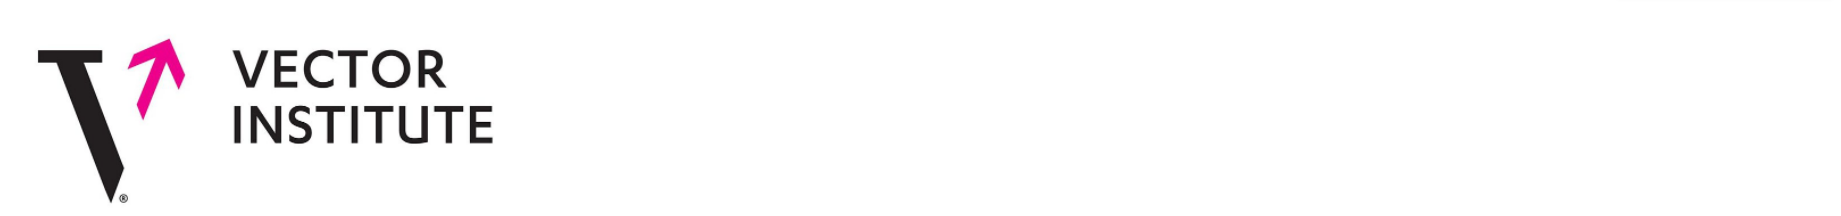

## Homework 2, part II. Decision Trees

We  will  use  a  dataset  of  1298  “fake  news”  headlines  (which  mostly  include 
headlines  of  articles  classified  as  biased,  etc.)  and  1968  “real”  news  headlines, 
where the “fake news” headlines are from https://www.kaggle.com/mrisdal/fake-news/data and “real news” headlines are from https://www.kaggle.com/therohk/million-headlines.  The  data  were  cleaned  by  removing  words  from  fake  news 
titles  that  are  not  a  part  of  the  headline,  removing  special  characters  from  the 
headlines,  and  restricting  real  news  headlines  to  those  after  October  2016 
containing the word “trump”. The cleaned-up data are available as clean_real.txt 
and clean_fake.txt in the google colab file. 

Each headline appears as a single line in the data file. You will build a decision 
tree to classify real vs. fake news headlines. Instead of coding the decision trees 
yourself,  you  will  do  what  we  normally  do  in  practice  —  use  an  existing 
implementation.  You  should  use  the  DecisionTreeClassifier  included  in  sklearn. 
Note that figuring out how to use this implementation is a part of the 
assignment.



In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

import numpy as np

from sklearn import tree
import graphviz

from matplotlib import pyplot as plt

In [92]:
#These two lines allow you to import the necessary data for this tutorial
#You can open the links to see the content of those files if you are curious
! wget https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_fake.txt 
! wget https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_real.txt

# This function performs a data split (training, validation, test sets)
def split_data(X, y, train_size=0.7, val_size=0.15):
    total_data = X.shape[0] # This line allows to get the dimension of the first axis of X, which is the total number of data points
    train_size = int(train_size * total_data)
    val_size = int(val_size * total_data)
    test_size = total_data - train_size - val_size

    all_indices = np.random.permutation(np.arange(total_data)) #This line is used to randomize the indices of X and y before splitting into train, validation and test sets
    train_indices = all_indices[:train_size]
    val_indices = all_indices[train_size:train_size + val_size]
    test_indices = all_indices[train_size+val_size:]

    train_X, train_y = X[train_indices], y[train_indices]
    val_X, val_y = X[val_indices], y[val_indices]
    test_X, test_y = X[test_indices], y[test_indices]

    #The output of this function below is a python dictionnay. For instance, to access the train data, you need to access data['train'], if the output of this function is called "data"
    #More details about python dictionaries can be found on this link: https://realpython.com/python-dicts/
    return {
        'train': (train_X, train_y),
        'val':  (val_X, val_y),
        'test': (test_X, test_y)
    }

# This function loads, processes (with CountVectorizer, read and understand the documentation https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html )
# and splits the data from the downloaded files 
def load_data(paths):
    vec = CountVectorizer(input='content')
    lines = []
    counts = []
    for p in paths: # This loop is used to read the files in each path. More details reading files can be found here: https://www.w3schools.com/python/python_file_open.asp
        with open(p) as f:
            file_lines = f.readlines()
        counts.append(len(file_lines))
        lines.extend([l.strip() for l in file_lines])

    vec.fit(lines) #more details about "fit" are provided here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit
    data_matrix = vec.transform(lines).toarray() #more details about "transform" can be found here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.transform
    y = np.concatenate((np.zeros(counts[0]), np.ones(counts[1]))) #Labels 0 are given for real data and Labels 1 for fake data. np.concatenate is used to merge the labels in one array before splitting the data in the next line.
    return split_data(data_matrix, y), vec.get_feature_names_out()

data, feature_names = load_data(['/content/clean_real.txt', '/content/clean_fake.txt'])    

!rm clean* # this is to delete the data from the google colab after we downloaded them


--2022-03-28 12:12:48--  https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_fake.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94400 (92K) [text/plain]
Saving to: ‘clean_fake.txt’

clean_fake.txt      100%[===================>]  92.19K  --.-KB/s    in 0.02s   

2022-03-28 12:12:49 (5.86 MB/s) - ‘clean_fake.txt’ saved [94400/94400]

--2022-03-28 12:12:49--  https://raw.githubusercontent.com/carrasqu/datah2/master/data/clean_real.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103149 (101K) [text/plain]
Sa

## 2.A

In [93]:
# Extract the dimensionality of the feature vectors, the number of datapoints in the training, validation and test sets. 


#Check what is in the feature_names
print(feature_names)
print("length of feature vectors=", len(feature_names))

#Check what is in the data
print("Number of keys in data= ", len(data))
print("Keys in data are: ", dict.keys(data))

for k, v in data.items():
    print("For data set",k,", no. of datapoints=",len(v[0]))


['00' '000' '10' ... 'zuesse' 'zulema' 'zur']
length of feature vectors= 5799
Number of keys in data=  3
Keys in data are:  dict_keys(['train', 'val', 'test'])
For data set train , no. of datapoints= 2286
For data set val , no. of datapoints= 489
For data set test , no. of datapoints= 491


## 2.B

In [104]:
# Complete a function to compute the accuracy of a given model on input data X
# and label t
# You can get some inspiration from the code of Homework 1

import random
from sklearn import metrics

def get_acc(model, X, t):
    #Predict the response for test dataset
    y_pred = model.predict(X)

    #acc = (y_pred == t).mean 
    #I thought this would work but it doesn't. i expected acc to be a float, but
    # it is coming out as 'builtin_function_or_method' object
    #So I try using the accuracy_score library instead.

    acc = metrics.accuracy_score(t, y_pred)

    return acc


In [149]:

# Complete a function that defines and trains decision trees on different depths and split criterion on the data
# store the model, the training accuracy and validation accuracy in the dict out 
# You can take a look at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# You can also read the user-guide https://scikit-learn.org/stable/modules/tree.html#tree
def select_model(depths, data, criterion ):
    out = {}
    for d in depths:
        print('Evaluating on depth {}'.format(d))
        out[d] = {}

        # Create Decision Tree classifier object
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=d)
 
        # Train Decision Tree Classifier
        clf = clf.fit(*data['train'])
  
        out[d]['val'] = get_acc(clf, *data['val'])
        out[d]['train'] = get_acc(clf, *data['train'])
        out[d]['model'] = clf
  
    return out


## 2.C

In [158]:
# Code to train the models on multiple depths and two split criteria 

# train the models with the information gain criterion

depths = [1,2,3,4,5,6,7,8,9,10] # the depths you want to explore go in the depths list 

res_entropy = select_model(depths,data, "entropy") # training models with different depths using information gain

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
best_d_entropy = None
best_acc_entropy = 0

for d in res_entropy:
    val_acc = res_entropy[d]['val']
    print("Depth: {}   Train: {}    Val: {}".format(d, res_entropy[d]['train'], val_acc))
    if val_acc  > best_acc_entropy:
        best_d_entropy = d
        best_acc_entropy = val_acc

# train the models with the gini impurity criterion 

res_gini = select_model(depths,data,"gini") # training models with different depths using gini impurity 

# looping over the different models and accuracies to find the optimal model according to its validation accuracy
best_d_gini = None
best_acc_gini = 0

for d in res_gini:
    val_acc = res_gini[d]['val']
    print("Depth: {}   Train: {}    Val: {}".format(d, res_gini[d]['train'], val_acc))
    if val_acc  > best_acc_gini:
        best_d_gini = d
        best_acc_gini = val_acc


Evaluating on depth 1
Evaluating on depth 2
Evaluating on depth 3
Evaluating on depth 4
Evaluating on depth 5
Evaluating on depth 6
Evaluating on depth 7
Evaluating on depth 8
Evaluating on depth 9
Evaluating on depth 10
Depth: 1   Train: 0.5993000874890638    Val: 0.6278118609406953
Depth: 2   Train: 0.6382327209098863    Val: 0.6666666666666666
Depth: 3   Train: 0.6469816272965879    Val: 0.6646216768916156
Depth: 4   Train: 0.7047244094488189    Val: 0.721881390593047
Depth: 5   Train: 0.7086614173228346    Val: 0.7198364008179959
Depth: 6   Train: 0.7125984251968503    Val: 0.721881390593047
Depth: 7   Train: 0.7292213473315835    Val: 0.7300613496932515
Depth: 8   Train: 0.7436570428696413    Val: 0.7321063394683026
Depth: 9   Train: 0.7515310586176728    Val: 0.7321063394683026
Depth: 10   Train: 0.7620297462817148    Val: 0.7464212678936605
Evaluating on depth 1
Evaluating on depth 2
Evaluating on depth 3
Evaluating on depth 4
Evaluating on depth 5
Evaluating on depth 6
Evaluati

In [166]:
# Compute and report the test accuracy of the best model here 

print("best_acc_entropy:",best_acc_entropy)
for d in res_entropy:
    val_acc = res_entropy[d]['val']
    if val_acc  == best_acc_entropy:
        best_clf_entropy = res_entropy[d]['model']

print("best_acc_gini", best_acc_gini)
for d in res_gini:
    val_acc = res_gini[d]['val']
    if val_acc  == best_acc_gini:
        best_clf_gini = res_gini[d]['model']

#Entropy and gini seem to perform equally, with best accuracy around 0.7.

best_acc_entropy: 0.7464212678936605
best_acc_gini 0.7382413087934561


## 2.D

[Text(0.5, 0.875, 'the <= 0.5\ngini = 0.48\nsamples = 2286\nvalue = [1370, 916]'),
 Text(0.25, 0.625, 'hillary <= 0.5\ngini = 0.452\nsamples = 1905\nvalue = [1249, 656]'),
 Text(0.125, 0.375, 'donald <= 0.5\ngini = 0.43\nsamples = 1798\nvalue = [1236, 562]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'donald <= 0.5\ngini = 0.213\nsamples = 107\nvalue = [13, 94]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'trumps <= 0.5\ngini = 0.433\nsamples = 381\nvalue = [121, 260]'),
 Text(0.625, 0.375, 'year <= 0.5\ngini = 0.412\nsamples = 365\nvalue = [106, 259]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'energy <= 0.5\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

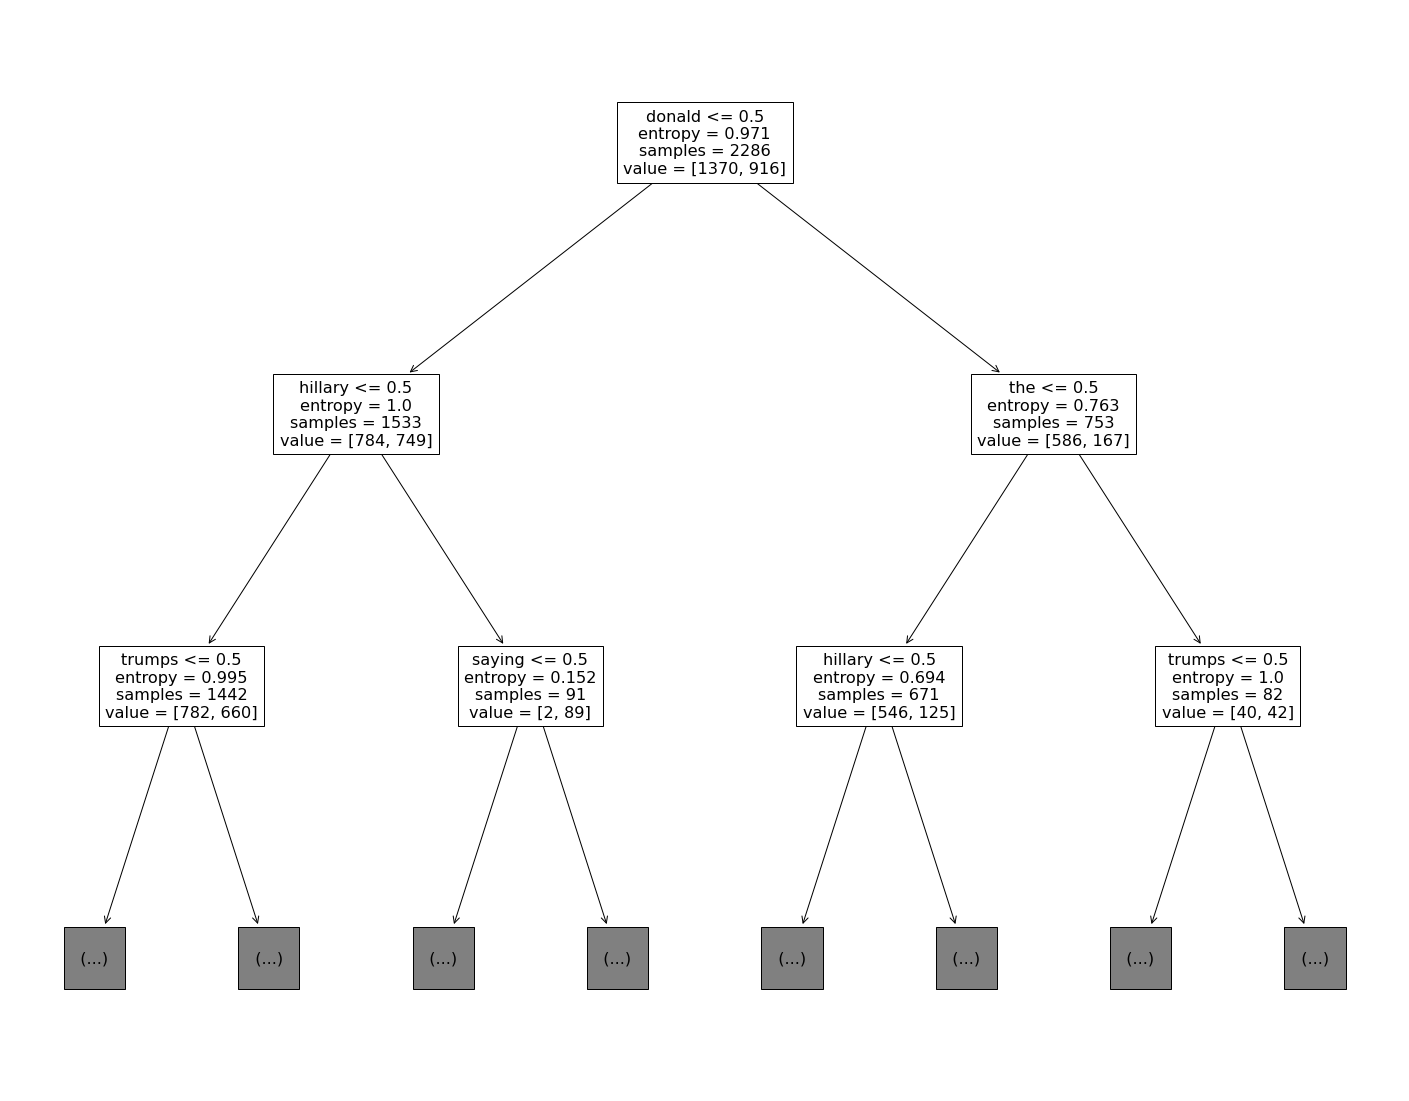

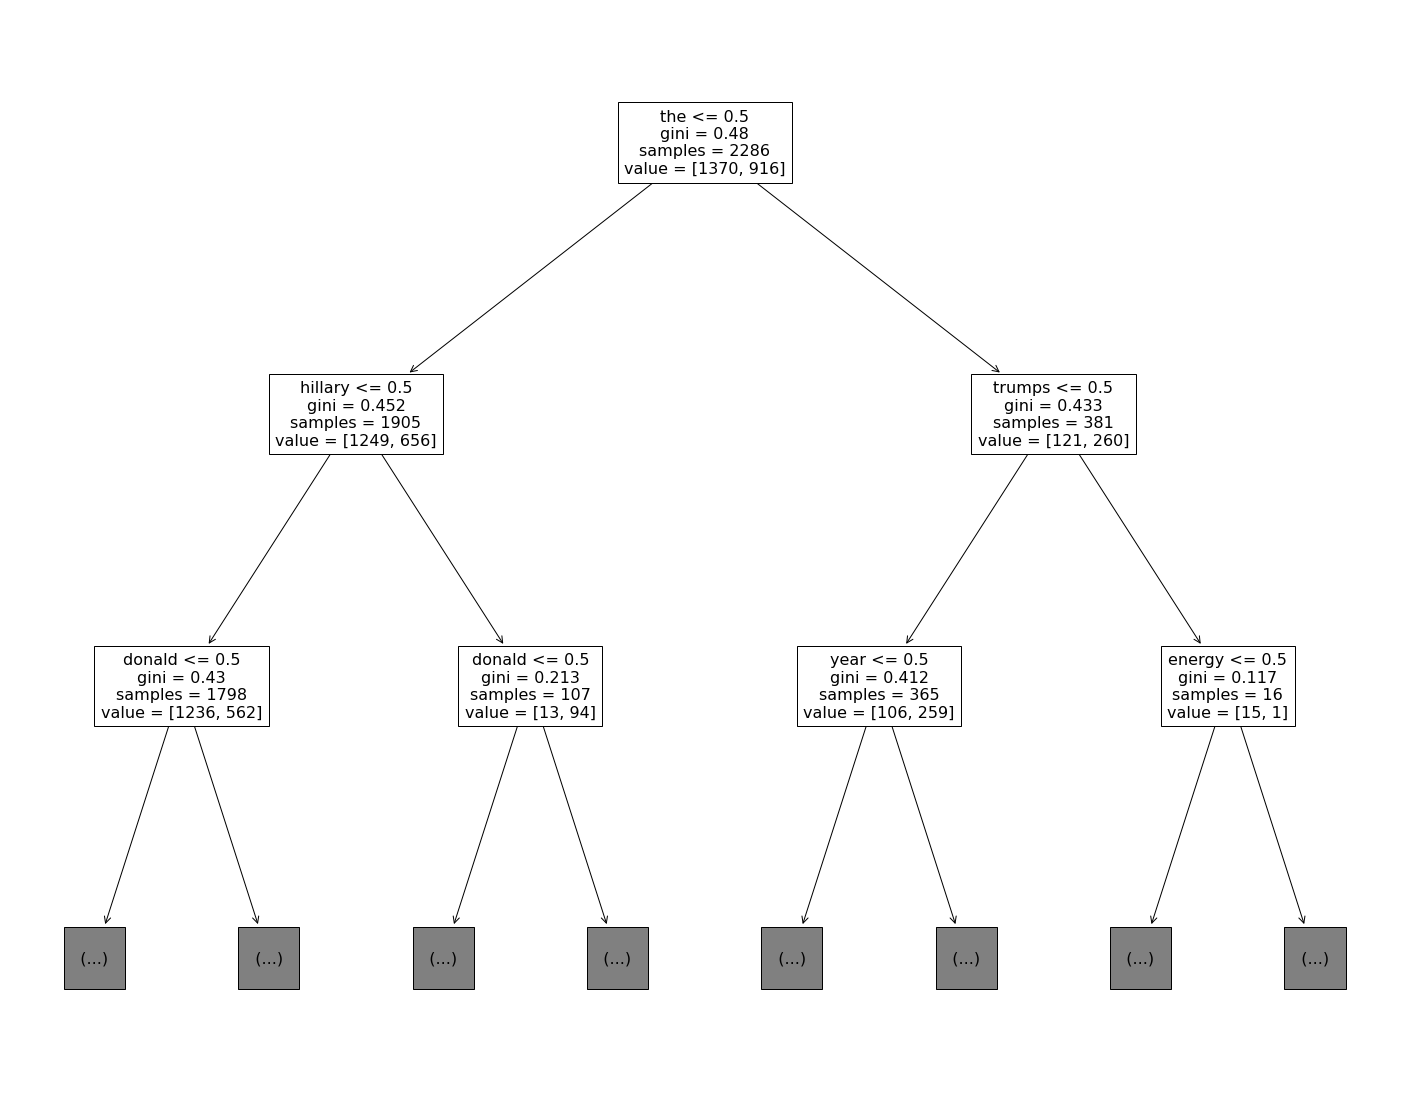

In [165]:
# visualize the two first two layers of the tree here if doing it by code


fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_clf_entropy,
               feature_names=feature_names,  
               max_depth=2)


fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_clf_gini,
               feature_names=feature_names,  
               max_depth=2)